# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge (study_results, mouse_metadata, on = "Mouse ID" )

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
num_mice = combine_data ["Mouse ID"]. nunique()
num_mice

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combine_data[combine_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

import numpy as np
output_array = np.array(duplicate_mouse_ids)
output_array

array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = 'g989'
duplicate_mouse_data = combine_data[combine_data["Mouse ID"] == duplicate_mouse_id]
(duplicate_mouse_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combine_data[~combine_data["Mouse ID"].isin(duplicate_mouse_ids)]
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned=cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Std_Dev="std",
    Tumor_Volume_Std_Err="sem"
)
# Assemble the resulting series into a single summary DataFrame.
summary_df = summary_stats.reset_index()
summary_df.set_index("Drug Regimen", inplace=True)
summary_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = (
    cleaned_data
    .groupby("Drug Regimen")["Tumor Volume (mm3)"]
    .agg(["mean", "median", "var", "std", "sem"])
)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats.columns])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

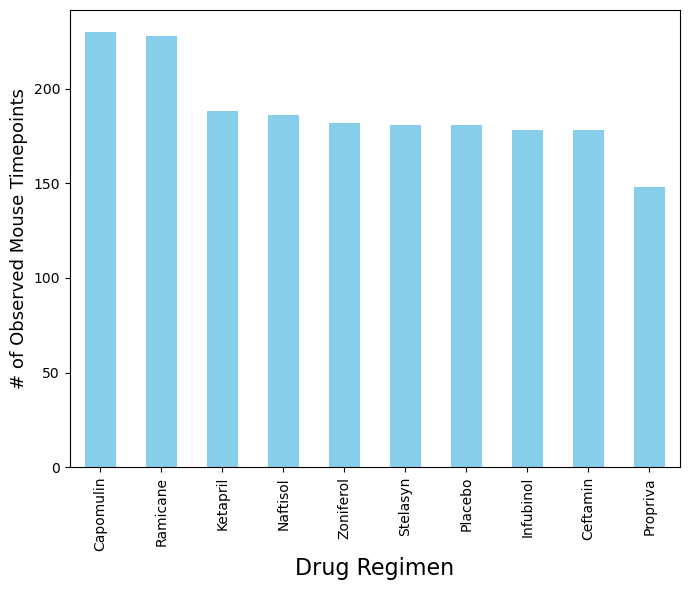

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts.plot(kind='bar', figsize=(7, 6), color='skyblue')
plt.xlabel('Drug Regimen', fontsize=16)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=13)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show  

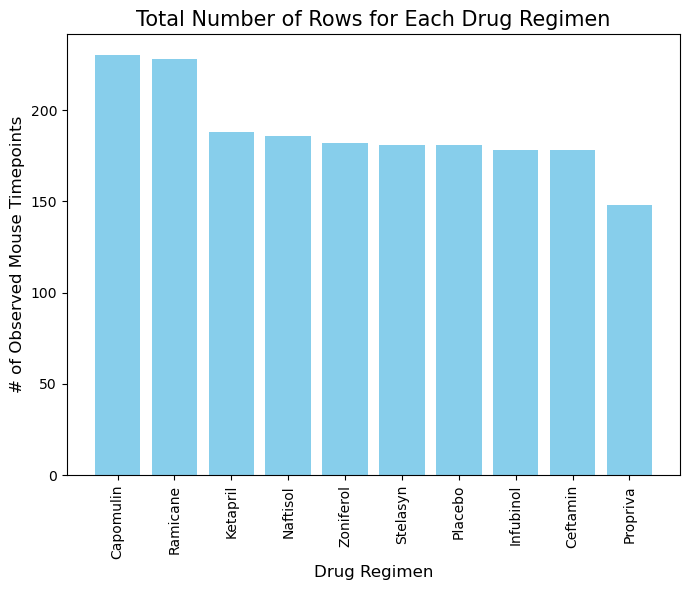

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(7, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=15)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

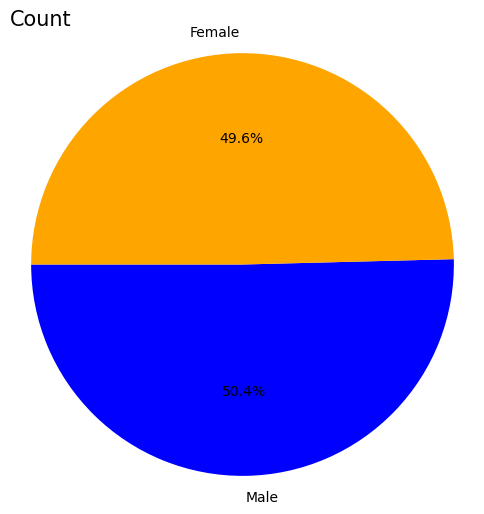

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Sex', 'Mouse ID']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice ['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))  
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=['blue', 'orange'])
plt.title('Count', fontsize=15, loc='left')
plt.axis('equal')
plt.show()

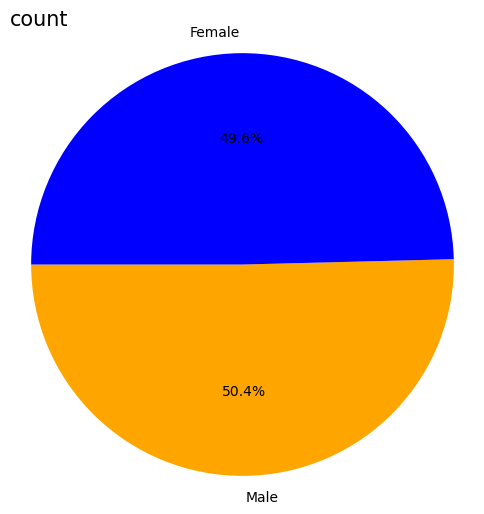

In [68]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=180, 
    colors=['orange', 'blue']
)
plt.title('count', fontsize=15, loc='left')  
plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treatment_df = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, treatment_df, on=['Mouse ID', 'Timepoint'], how='left')


# Create an empty list to fill with tumor volume data for plotting
tumor_volumes = []

# Put treatments into a list for for loop (and later for plot labels)

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(subset)

   # Calculate the IQR and quantitatively determine if there are any potential outliers.
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1  # Calculate the interquartile range
    
    # add subset
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

   
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


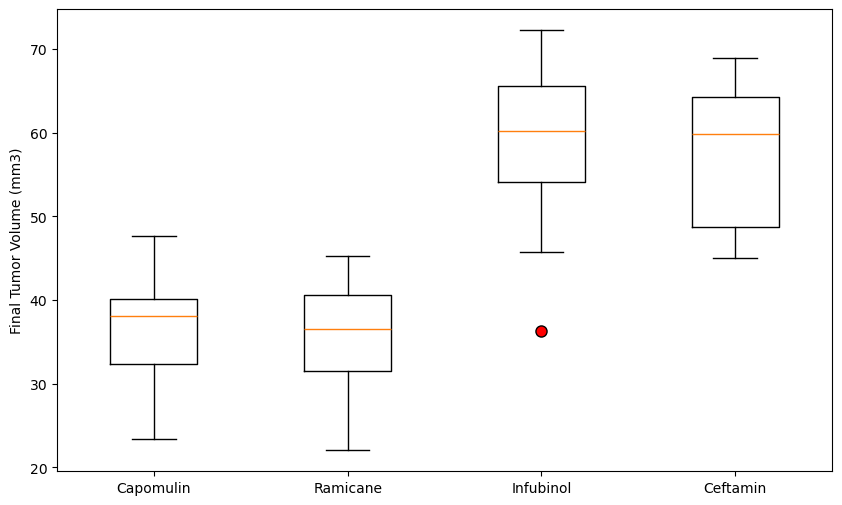

In [70]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_list = [tumor_volumes[i] for i in range(len(treatments))]
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

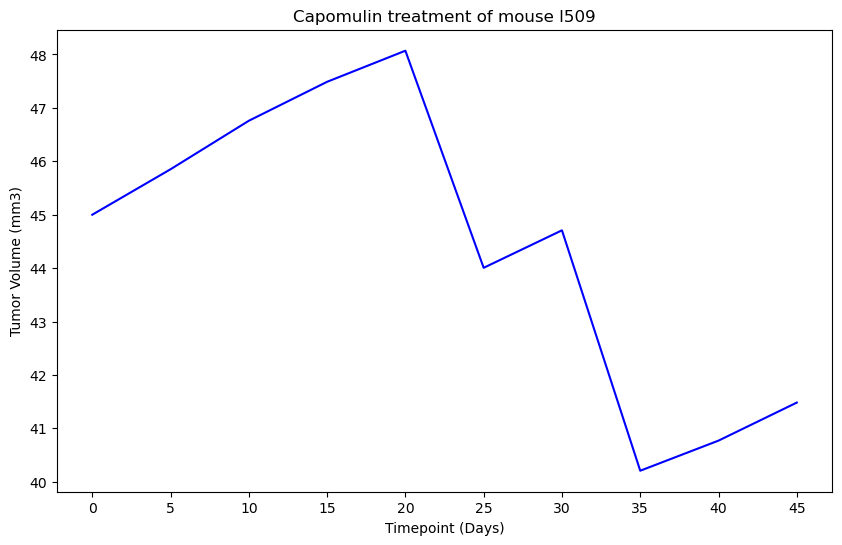

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='blue')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_data['Timepoint']) 
plt.show()

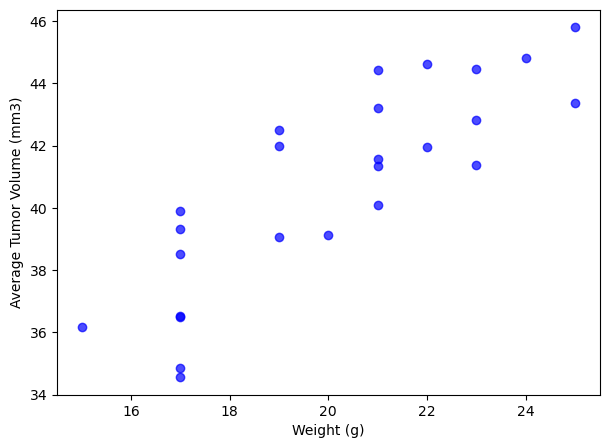

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']


avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'first')  
).reset_index()


plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_vol['Weight'], avg_tumor_vol['Avg_Tumor_Volume'], color='blue', alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



plt.show()

## Correlation and Regression

Correlation coefficient (Pearson's r): 0.8419
p-value: 0.0000
Linear regression equation: y = 0.9544x


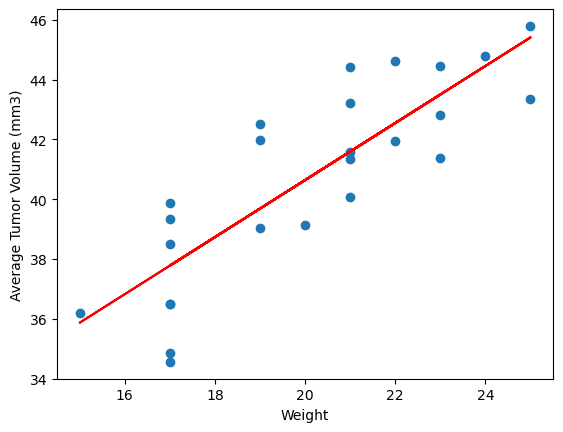

In [56]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'first')
).reset_index()
correlation, p_value = st.pearsonr(avg_tumor_vol['Weight'], avg_tumor_vol['Avg_Tumor_Volume'])
print(f"Correlation coefficient (Pearson's r): {correlation:.4f}")
print(f"p-value: {p_value:.4f}")
from sklearn.linear_model import LinearRegression
X = avg_tumor_vol[['Weight']]
y = avg_tumor_vol['Avg_Tumor_Volume']
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear regression equation: y = {slope:.4f}x")
x_values = avg_tumor_vol['Weight']
y_values = avg_tumor_vol['Avg_Tumor_Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.84,0.95),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()